In [2]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
#import kuramoto as kmox
import plot as pltfn
from kuramoto1 import Kuramoto
from scipy import stats 

sns.reset_orig()
plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [3]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
itbinlist = sorted(glob.glob('*.*binarised*')) #iterated list - binarised trace
binlist = sorted(glob.glob('*_PTZ*cutbinarised.npy')) #list - binarised trace
cutbinlist = sorted(glob.glob('*cutbinarised.npy')) #list - 30 minute binarised trace
nnblist = sorted(glob.glob('*_PTZ*_nnb.npy')) #list - nearest neighbour matrix
itnnblist = sorted(glob.glob('*itnnb*')) #iterated list - nearest neighbour matrix
itpkglist = sorted(glob.glob('*03*nnbpkg*')) #list - peak group duration
itavlist = sorted(glob.glob('*-02*nnbav*')) #list - avalanche size and duration array
BLNavlist = sorted(glob.glob('*_BLN*_av*')) #list - avalanche size and duration array
P20avlist = sorted(glob.glob('*_PTZ20*_av*')) #list - avalanche size and duration array
P5avlist = sorted(glob.glob('*_PTZ05*_av*')) 

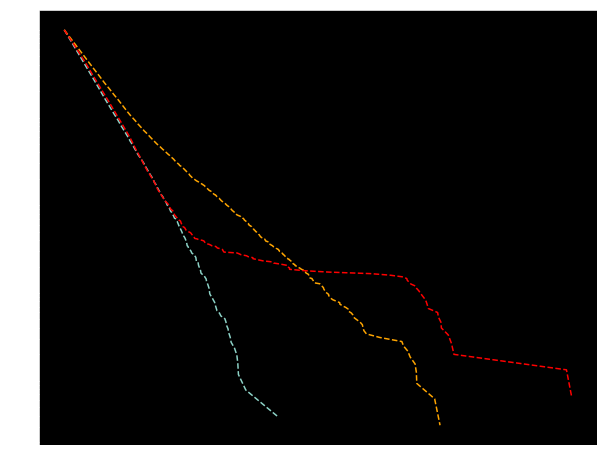

In [4]:
import powerlaw

i = 6
avdistcut = np.load(BLNavlist[i])[0]
f, axarr = plt.subplots(figsize = (10,8))
#pdf = powerlaw.plot_pdf(avdistcut)
ccdf = powerlaw.plot_ccdf(avdistcut, linestyle = '--')
#fiti = fit.power_law.plot_pdf(avdistcut)
#avdistcut = np.load(P5avlist[i])[0]
#pdf1 = powerlaw.plot_pdf(avdistcut)
#ccdf1 = powerlaw.plot_ccdf(avdistcut)
avdistcut = np.load(P5avlist[i])[0]
#pdf1 = powerlaw.plot_pdf(avdistcut)
ccdf1 = powerlaw.plot_ccdf(avdistcut, c = 'orange', linestyle = '--')
avdistcut = np.load(P20avlist[i])[0]
#pdf1 = powerlaw.plot_pdf(avdistcut)
ccdf1 = powerlaw.plot_ccdf(avdistcut, c = 'r', linestyle = '--')

#plt.savefig('powerlawdeviation.svg', transparent = True)

In [ ]:
[1000.0, 210.0, 150.0, 990.0, 4, 5, 6, 7, 8, 9, 10]

In [20]:
import powerlaw
#-----------
for i in range(len(avlist)):
    data = np.load(avlist[i])[0]
    maxi = 100
    fit = powerlaw.Fit(data, discrete = True, xmax = maxi)
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    R, p = fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio=True)
    
    print(avlist[i][avlist[i].find('run')-4:avlist[i].find('run')-1] + ' likelihood = ' + str(R) + ' ' + 'p-value = ' + str(p) + ' alpha = ' + str(alpha) + 'sigma = ' + str(sigma))  

Calculating best minimal value for power law fit


BLN likelihood = 3.0752162107081555 p-value = 0.0021035000444684653 alpha = 2.4834152830161447sigma = 0.010505099544679446


Calculating best minimal value for power law fit


BLN likelihood = 2.137027501250386 p-value = 0.03259575486488704 alpha = 3.1417965623598327sigma = 0.04779652941763361


Calculating best minimal value for power law fit


BLN likelihood = 4.8400270121945805 p-value = 1.29821481724713e-06 alpha = 2.2894328841255867sigma = 0.009063896672013549


Calculating best minimal value for power law fit


BLN likelihood = -1.4110504270081268 p-value = 0.15822974560064307 alpha = 2.5279697332981748sigma = 0.011533243106415984


Calculating best minimal value for power law fit


BLN likelihood = -0.03828339294592357 p-value = 0.9694617315889814 alpha = 3.086231944266105sigma = 0.03202017813933144


Calculating best minimal value for power law fit


BLN likelihood = 0.04402737616899234 p-value = 0.9648825819932885 alpha = 2.851003036589736sigma = 0.013520699618998858


Calculating best minimal value for power law fit


BLN likelihood = 3.461575644213678 p-value = 0.0005370231801142983 alpha = 2.7164233805099878sigma = 0.02017228700826534


Calculating best minimal value for power law fit


BLN likelihood = 1.7210784375574193 p-value = 0.08523659145592452 alpha = 3.760606390232657sigma = 0.05572719835437289


Calculating best minimal value for power law fit


BLN likelihood = 6.362950824475382 p-value = 1.979140705638975e-10 alpha = 2.4247098511131826sigma = 0.009977899258110904


Calculating best minimal value for power law fit


BLN likelihood = 3.3052062234077506 p-value = 0.0009490654051080312 alpha = 2.995625338191892sigma = 0.028453821204419204


Calculating best minimal value for power law fit


BLN likelihood = 3.2135206804052414 p-value = 0.0013111835532567215 alpha = 2.340502555821857sigma = 0.006346183079125972


In [13]:
import powerlaw
#-----------
for i in range(len(avlist)):
    data = np.load(avlist[i])[0]
    maxi = 1000
    fit = powerlaw.Fit(data, discrete = True, xmax = maxi)
    R, p = fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio=True)
    
    print(avlist[i][avlist[i].find('run')-4:avlist[i].find('run')-1] + ' likelihood = ' + str(R) + ' ' + 'p-value = ' + str(p))  

Calculating best minimal value for power law fit


BLN likelihood = 2.303726763800088 p-value = 0.021237986475063517


Calculating best minimal value for power law fit


BLN likelihood = 0.04582289120339003 p-value = 0.963451413430263


Calculating best minimal value for power law fit


BLN likelihood = -4.7373692029686945 p-value = 2.165105067581625e-06


Calculating best minimal value for power law fit
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/powerlaw.py:1560: RuntimeWarning: divide by zero encountered in true_divide
  return likelihoods/norm
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/powerlaw.py:1798: RuntimeWarning: invalid value encountered in subtract
  ( (loglikelihoods1-loglikelihoods2) - mean_diff)**2
Calculating best minimal value for power law fit


BLN likelihood = nan p-value = nan
BLN likelihood = nan p-value = nan


Calculating best minimal value for power law fit


BLN likelihood = -0.5398885088314773 p-value = 0.5892739230696391


Calculating best minimal value for power law fit


BLN likelihood = 1.362703222241699 p-value = 0.17297606191324333


Calculating best minimal value for power law fit


BLN likelihood = -1.9864358982949526 p-value = 0.04698494390033107


Calculating best minimal value for power law fit


BLN likelihood = 0.030863807175805422 p-value = 0.9753781538530536


Calculating best minimal value for power law fit


BLN likelihood = -0.3975935955245036 p-value = 0.6909297821978195


Calculating best minimal value for power law fit


BLN likelihood = -1.8548796834566135 p-value = 0.06361340980658683


In [12]:
import powerlaw
#-----------
for i in range(len(avlist)):
    data = np.load(avlist[i])[0]
    maxi = 1000
    fit = powerlaw.Fit(data, discrete = True, xmax = maxi)
    R, p = fit.distribution_compare('truncated_power_law', 'exponential', normalized_ratio=True)
    
    print(avlist[i][avlist[i].find('run')-4:avlist[i].find('run')-1] + ' likelihood = ' + str(R) + ' ' + 'p-value = ' + str(p))  

Calculating best minimal value for power law fit


BLN likelihood = 21.949825741913013 p-value = 8.693402772924258e-107


Calculating best minimal value for power law fit


BLN likelihood = 4.418918073062824 p-value = 9.91962389579086e-06


Calculating best minimal value for power law fit


BLN likelihood = 26.996510544777838 p-value = 1.624106289843868e-160


Calculating best minimal value for power law fit


BLN likelihood = 26.54145777224864 p-value = 3.2229117537441562e-155


Calculating best minimal value for power law fit


BLN likelihood = 5.6859594923546775 p-value = 1.3008022821039927e-08


Calculating best minimal value for power law fit


BLN likelihood = 6.116349720067671 p-value = 9.574308993380875e-10


Calculating best minimal value for power law fit


BLN likelihood = 11.594414238194144 p-value = 4.39864720313108e-31


Calculating best minimal value for power law fit


BLN likelihood = 1.725335976638004 p-value = 0.08446694197836085


Calculating best minimal value for power law fit


BLN likelihood = 24.411020450400013 p-value = 1.30628896967155e-131


Calculating best minimal value for power law fit


BLN likelihood = 6.035233571861512 p-value = 1.587329214388518e-09


Calculating best minimal value for power law fit


BLN likelihood = 25.7027993158258 p-value = 1.087621145686518e-145


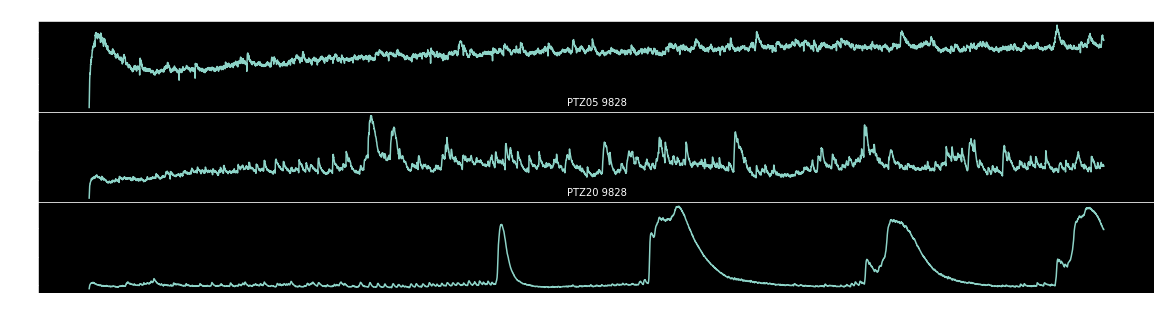

In [3]:
# PLOT - average whole brain fluorescence
#----------------------------------------
deltalist = sorted(glob.glob('*E-12*deltaff.npy'))
f, axarr = plt.subplots(3,1,sharey=False, sharex=False, figsize = (20,5))
f.subplots_adjust(hspace=0)
for i in range(len(deltalist)):
    me = np.load(deltalist[i])
    axarr[i].set_title(deltalist[i][deltalist[i].find('dpf')+4:deltalist[i].find('run')-1] + ' ' + str(me.shape[1]), size = 10)
    new = np.apply_along_axis(np.mean, 0, me)
    axarr[i].plot(new)

plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


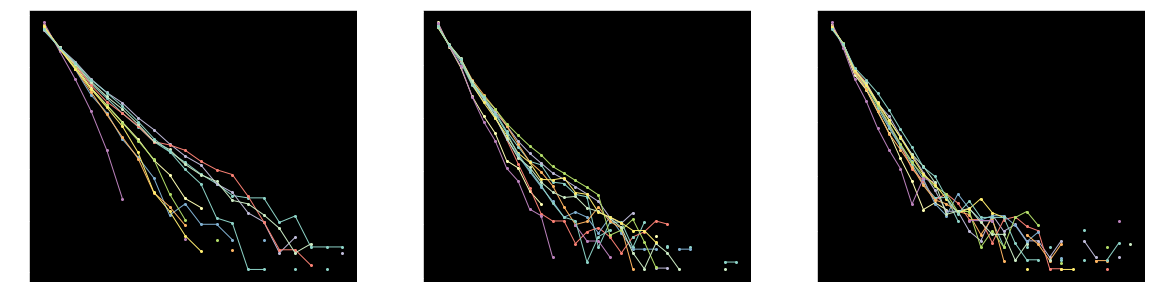

In [4]:
f, axarr = plt.subplots(1,3,sharey=False, sharex=False, figsize = (20,5))
f.subplots_adjust(hspace=0)

for t in range(len(comblist)):
    nowlist = comblist[t]
    
    newvec = []
    for i in range(len(nowlist)):
        newvec = np.append(newvec, np.load(nowlist[i]))
    mini = np.min(newvec)
    maxi = np.max(newvec)

    for i in range(len(nowlist)):
        avdistcut = np.load(nowlist[i])
        binned=np.logspace(np.log10(mini),np.log10(maxi), 30)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[t].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o-', linewidth = 1, markersize = 2)

plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


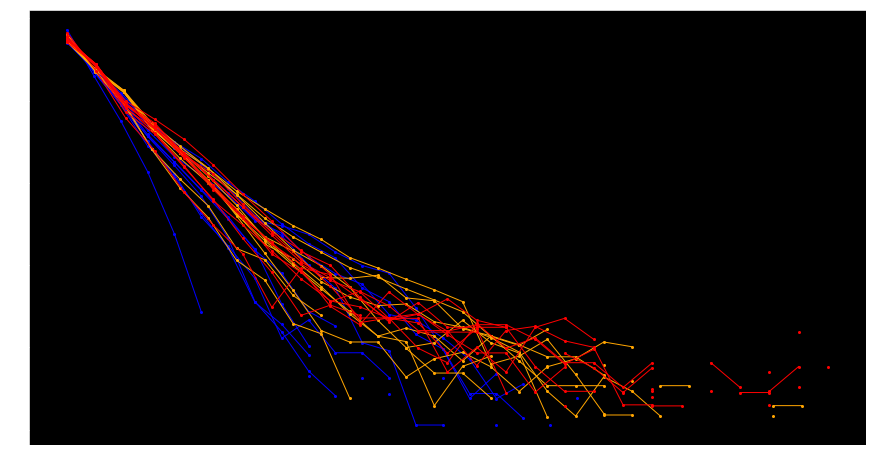

In [4]:
f, axarr = plt.subplots(figsize = (15,8))
for t in range(len(comblist)):
    nowlist = comblist[t]
    colist = ['blue', 'orange', 'red']
    
    newvec = []
    for i in range(len(nowlist)):
        newvec = np.append(newvec, np.load(nowlist[i]))
    mini = np.min(newvec)
    maxi = np.max(newvec)

    
    for i in range(len(nowlist)):
        avdistcut = np.load(nowlist[i])
        binned=np.logspace(np.log10(mini),np.log10(maxi), 30)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o-', linewidth = 1, markersize = 2, color = colist[t])

plt.show()


In [21]:
singlelist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_newavsizelist.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_newavsizelist.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_newavsizelist.npy']

PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_newavsizelist.npy
PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_newavsizelist.npy
PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_newavsizelist.npy


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


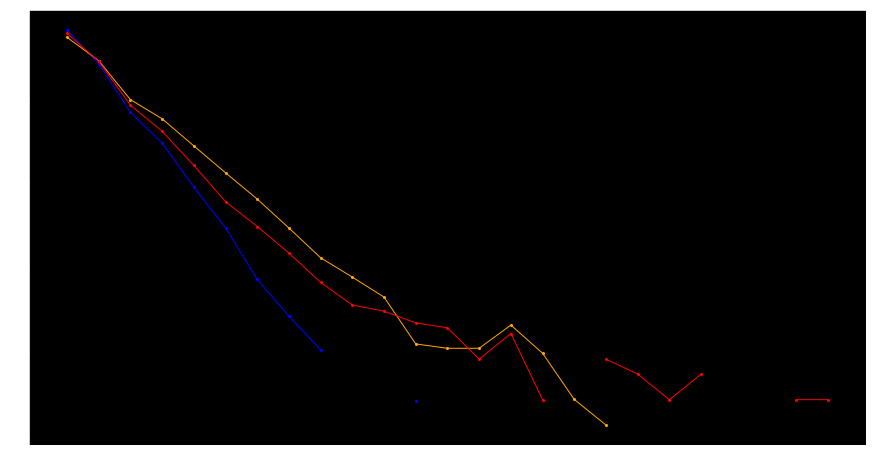

In [9]:
pick = 4
singlelist = [BLNsizelist[pick], P5sizelist[pick], P20sizelist[pick]]
colist = ['blue', 'orange', 'red']

f, axarr = plt.subplots(figsize = (15,8))

for t in range(len(singlelist)):
    newvec = np.append(newvec, np.load(singlelist[t]))
mini = np.min(newvec)
maxi = np.max(newvec)
    
for t in range(len(singlelist)):
    avdistcut = np.load(singlelist[t])
    binned=np.logspace(np.log10(mini),np.log10(maxi), 30)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o-', linewidth = 1, markersize = 2, color = colist[t])
    print(singlelist[t])

plt.show()


